In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=10
paper='2004.04168'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright, let's analyze this Hartree-Fock Hamiltonian step by step to understand its structure and implement it correctly.

First, I'll identify the components of the Hamiltonian:

1. Kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
   where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$

2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$

3. Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

4. Interaction potential: $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Now, let's answer the questions:

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I need to identify all the flavors present. In this case, the only flavor identifier I see is $s$, which represents spin. The Hamiltonian 

In [7]:
print(generated_code['thinking'])

Alright, let's analyze this Hartree-Fock Hamiltonian step by step to understand its structure and implement it correctly.

First, I'll identify the components of the Hamiltonian:

1. Kinetic term: $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
   where $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$

2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$

3. Fock term: $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

4. Interaction potential: $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$

Now, let's answer the questions:

### QUESTION 1: Dimension and Basis Order

Looking at the Hamiltonian, I need to identify all the flavors present. In this case, the only flavor identifier I see is $s$, which represents spin. The Hamiltonian doesn't specify how many spin values are present, but

In [8]:
print(generated_code['text'])

# Answer to Hartree-Fock Hamiltonian Implementation

## 1) Dimension and Basis Order:
Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: up, down

## 2) Identifying Interacting Terms:
EXP-VAL DEPENDENT TERMS: {
    r"\langle c_s^\dagger(k_1) c_s(k_1) \rangle": "Average spin density: np.mean(exp_val[s, s, :])",
    r"\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle": "Spin-flip expectation value: exp_val[s, s', k1_idx]"
}

TERMS:
- $E_s(k) c^\dagger_s(k) c_s(k)$ -> H[0, 0, k] and H[1, 1, k], NI (Kinetic energy for spin up/down)
- $\frac{1}{N} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ -> H[0, 0, k] and H[1, 1, k], I (Hartree term)
- $-\frac{1}{N} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ -> H[0, 1, k] and H[1, 0, k], I (Fock term)

## 3) HartreeFock Hamiltonian Class:

```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamiltonian for

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamiltonian for a triangular lattice model with spin degrees of freedom.
  
  Implements a model with:
  - Nearest-neighbor (t_1) and next-nearest-neighbor (t_2) hopping
  - On-site (U_0) and nearest-neighbor (U_1) interactions
  
  Args:
    N_shell (int): Number of shells in k-space
    parameters (dict): Dictionary containing model parameters
    filling_factor (float): Filling factor of the system (default: 0.5)
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={'t_1': 6, 't_2': 1, 'U_0': 1.0, 'U_1': 0.1}, filling_factor: float=0.5):
    self.lattice = 'triangular'
    self.D = (2,)  # Spin up and spin down
    self.basis_order = {'0': 'spin'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy relevant parameters
    self.nu = filling_factor
    self.T = parameters.get('T', 0.0)  # temperature, default to 0
    self.a = parame

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_10.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

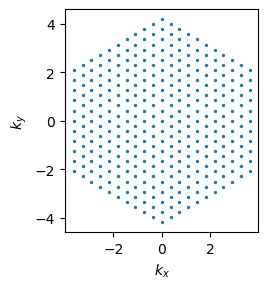

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

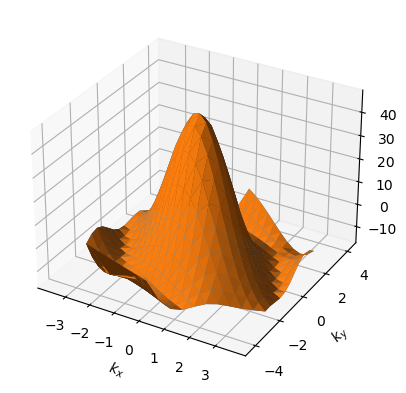

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

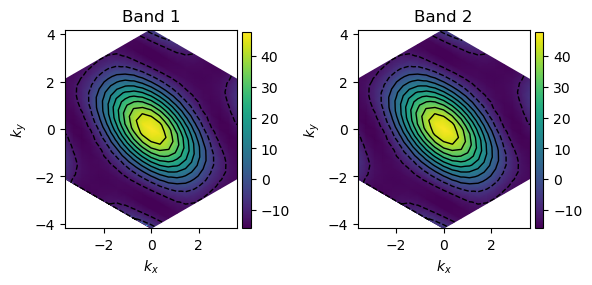

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e-5},filling_factor=0.5)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [25]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


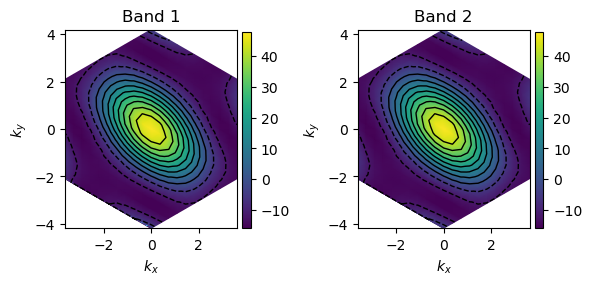

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e5},filling_factor=0.5)

In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


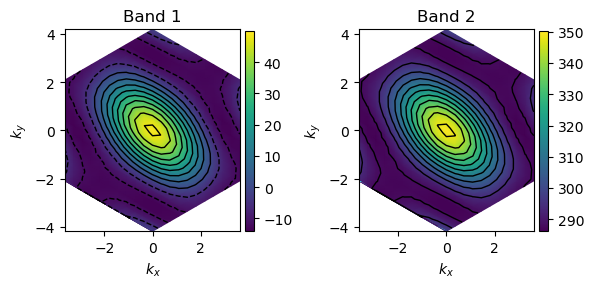

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 236.34
U/T is 11.08
mean_U is 75.99


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

I need to evaluate whether the image shown corresponds to the problem description, using the rubric provided. Let me break this down:

1. First, I need to understand what the image shows:
   - It appears to be a 2D plot in momentum space (k-space) with axes labeled kx and ky.
   - The points form a hexagonal pattern in k-space.
   - The points are arranged in a symmetric fashion around the origin (0,0).
   - The range of the plot is approximately -4 to 4 for ky and -3 to 3 for kx.

2. From the problem description:
   - We're dealing with a triangular lattice.
   - The Hamiltonian includes kinetic terms with hopping parameters (t_1, t_2) and interaction terms (Hartree-Fock).
   - There are on-site and nearest-neighbor interactions.

3. Checking against the rubric:
   - The image should show a momentum space mesh in the first Brillouin zone of the problem.
   - I need to check the point group symmetry.

For a triangular lattice, the fi

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the given image and determine whether it shows what's expected based on the problem and rubric.

The image shows two false color plots with contour lines, labeled as "Band 1" and "Band 2". These appear to be band structure plots in the first Brillouin zone for a system with two bands. Let me go through the rubric points one by one:

1. **Brillouin zone shape**: 
   The Brillouin zone boundary appears to have a hexagonal shape, which is indeed what we would expect for a triangular lattice. The hexagon is clearly visible in both plots, with corners at the six points of the boundary. This matches the expectation for a triangular lattice, so this point is correct.

2. **Symmetry of the energy distribution**:

   2.1 **Highest energy regions**: In both Band 1 and Band 2, the highest energy regions (colored yellow) appear to be concentrated near the center of the Brillouin zone, around the Γ point (k_x=0, k_y=0).
   
   2.2 

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu=1/2)
    )


#################### THINKING ####################

I need to analyze the given image to determine if it correctly displays the band structure for a triangular lattice after a self-consistent Hartree-Fock calculation with infinitesimal interaction. Let me go through the rubric step by step:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the Brillouin zone boundary has a hexagonal shape, which is indeed what is expected for a triangular lattice. The first Brillouin zone of a triangular lattice is a regular hexagon, and that's what I observe in both plots labeled "Band 1" and "Band 2".

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
In both Band 1 and Band 2, the highest energy regions (yellow) appear to be at the center of the Brillouin zone, around the point (0,0) in the k-space.


In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int=1e5)
    )


#################### THINKING ####################

Let me analyze the image provided that shows the band structure after a self-consistent Hartree-Fock calculation, and evaluate it according to the rubric criteria.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice:

The image shows two panels labeled "Band 1" and "Band 2". In both panels, the Brillouin zone is shown as a hexagon, which is indeed the correct Brillouin zone shape for a triangular lattice. A triangular lattice in real space corresponds to a hexagonal Brillouin zone in reciprocal space. So this aspect is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (yellow) appear at the center of both Band 1 and Band 2 plots, around the point (0,0), which would be the Γ point in the Brillouin zone.

2.2 Trace the pattern of energy var

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '10' saved to final_answer.yaml
